<a href="https://colab.research.google.com/github/GuillermoVlz/GotasDeMillikan/blob/main/Millikan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def line(xData, slope, intercept):
  return slope*xData + intercept

In [ ]:
path='/content/sample_data/gota2-11-e.txt'
df = pd.read_csv(path, encoding="utf-8", delimiter="\t")
df['r'] = df.r.values[0] # Toda la última columna con los valores de r

# Solo info de ascenso
#tiempos
xData = df.t_ascenso.values
xData = xData[~np.isnan(xData)] # Para eliminar los NaN (si es que los hay)
#altura
yData = df.y_ascenso.values
yData = yData[~np.isnan(yData)]


#radios
yError = df.r.values
yError = yError[0:len(xData)] # Solo toma la columna hasta el tamaño de los x,y Data

In [ ]:
parametersW, covarianceW = curve_fit(line, xData, yData, sigma = yError, absolute_sigma= True)
paramErrorsW = np.sqrt(np.diag(covarianceW))

In [ ]:
xline = np.linspace(xData[0],xData[len(xData)-1], num=100)
yfitW = line(xline, parametersW[0], parametersW[1])

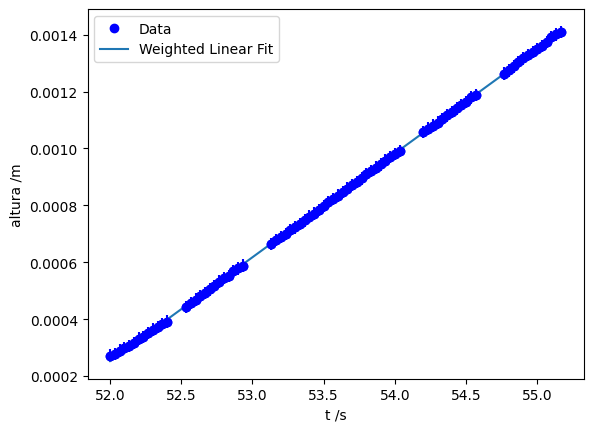

In [ ]:
plt.plot(xData, yData, "bo", label = "Data")
plt.errorbar(xData, yData, yError, fmt="bo")
plt.plot(xline, yfitW, label = "Weighted Linear Fit")
plt.xlabel("t /s")
plt.ylabel("altura /m")
plt.legend()
plt.show()

In [ ]:
print(parametersW[0], parametersW[1])

0.000364826662677043 -0.018718100070339777


In [ ]:
print(paramErrorsW)

[2.62905120e-06 1.40846688e-04]


In [ ]:
# Solo info de caidas
#tiempos
xData = df.t_caida.values
xData = xData[~np.isnan(xData)] # Para eliminar los NaN (si es que los hay)
#altura
yData = df.y_caida.values
yData = yData[~np.isnan(yData)]


#radios
yError = df.r.values
yError = yError[0:len(xData)] # Solo toma la columna hasta el tamaño de los x,y Data

In [ ]:
parametersW, covarianceW = curve_fit(line, xData, yData, sigma = yError, absolute_sigma= True)
paramErrorsW = np.sqrt(np.diag(covarianceW))

In [ ]:
xline = np.linspace(xData[0],xData[len(xData)-1], num=100)
yfitW = line(xline, parametersW[0], parametersW[1])

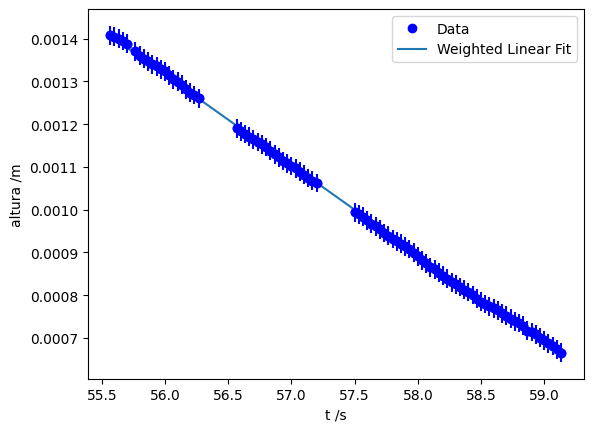

In [ ]:
plt.plot(xData, yData, "bo", label = "Data")
plt.errorbar(xData, yData, yError, fmt="bo")
plt.plot(xline, yfitW, label = "Weighted Linear Fit")
plt.xlabel("t /s")
plt.ylabel("altura /m")
plt.legend()
plt.show()

In [ ]:
print(parametersW[0], parametersW[1])

-0.00021057313451593518 0.013107839582902884


In [ ]:
print(paramErrorsW)

[2.12980080e-06 1.22378265e-04]
